# Introduction:


This Assignment is a programming assignment wherein we have to build a multiple linear regression model for the prediction of demand for shared bikes. 


# CONTENTS:
   
   ### 1.Introduction
   ### 2. Business Understanding
   ### 3. Business Problem 
   ### 4. Business Objectives
   
   ### 5. DATA UNDERSTANDING , PREPARATION AND EDA
   
   ### 6. MODEL BUILDING AND EVALUATION
 
   ### 7. ASSIGNMENT BASED SUBJECTIVE QUESTIONS

   ### 8. FINAL INFERENCES
 
   ### 9. CONCLUSIONS
 

# Business Understanding
BOOM BIKES, A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

# Business Problem
The bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Specifically, BoomBikes want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

> - Which variables are significant in predicting the demand for shared bikes.

> - How well those variables describe the bike demands


# Business Objectives
   We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#                       ----------------------------------------------------------------------------------------------------------------

 # ======================================================================================  ------------------[ > DATA UNDERSTANDING , PREPARATION AND EDA < ]------------===================================================================
 
 
 
 


# Step - 1 : Initial Approach to get into Data Understanding is to Source the DATA, before sourcing we add the necessary libraries to process this

LIBRARY IMPORT - PYTHON
We are importing all the necessary Python Libraries to pull and load Data on to the Frames
Libraries that shall be needed , Numpy for Arithematic, Pandas for Data Analystics, 
Seaborn for Visualization, Matplotlib for Mathematical plots, Plotly for graphing, analytics, and statistics tools. The 


                          [MEANING OF THE VARIABLES assigned to PYTHON LIBRARIES ARE DESCRIBED AS BELOW]

# Here we used Seaborn/sklearn Majorly instead of writing too many long code
# Also due to Jupyter Newer version, warnings are imported to suppress

In [55]:
import numpy as np                                               #Importing Numpy             and stored in variable 'np'
import pandas as pd                                              #Importing Pandas            and stored in variable 'pd'
from matplotlib import pyplot as plt                             #Importing Matplotlib        and stored in variable 'plt'
%matplotlib inline
import plotly.offline as py                                      #Importing plotly.offline    and stored in variable 'py'
import plotly.graph_objs as go                                   #Importing plotly.graph_objs and stored in variable 'go'
import plotly.tools as tls                                       #Importing Plotly.tools      and stored in variable 'tls'
import seaborn as sns                                            #Importing Seaborn           and stored in variable 'sns'
                         

import statsmodels.api as sm                                     #Importing Statmodels API        and stored in variable 'sm'
                                                                 #Importing VIF to Calculate variance inflation factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn                                                   #Importing sklearn for Regression model Building
from sklearn.model_selection import train_test_split             #Importing for test train split'
from sklearn.preprocessing import MinMaxScaler                   #Importing MinMaxScaler for Scaling the Data 
from sklearn.linear_model import LinearRegression                #Importing LinearRegression for the 
from sklearn.feature_selection import RFE                        #Importing Recursive Feature Elimination
from sklearn.metrics import r2_score                             #Importing r2_score for calculating co-eff of determination

from math import sqrt                                            #Importing sqrt             and stored in variable 'np'

import warnings                                                  #Importing the warnings to supress/filter warning messages
warnings.filterwarnings('ignore')


#                       ----------------------------------------------------------------------------------------------------------------

# STEP - 2 : In order to understand the data, we need to load the data into the data frame provided by PANDAS library


                                         
                                  In order to make it available Online for our use:                                    
   We Uploaded the File "day.csv" to           https://s3.ap-south-1.amazonaws.com/myawscloud.uk/day.csv
            
These Files are uploaded in AWS S3 directories in Online AWS Storage Account of Shasheesh Rane
   
      
                                              PROCESS = DATA SOURCING:
                                           
        Here we have imported the Data Frame into the Variable "boom_bike_data", by using is a PANDAS Function read_csv().                
               Here we mention the filename or URL in closed bracket here we are using the online URL    
 
 
 

In [56]:
#DATA LOADING IN PANDAS FROM ONLINE FILES
#          boom_bike_data = The RAW data read from CSV online or offline
# boom_bike_data_analysis = Copy of the RAW data to be operated or Data Analysis to performed upon.
#----------------(This is being done to have a copy of original RAW data at any time)--------------------------
boom_bike_data      = pd.read_csv('https://s3.ap-south-1.amazonaws.com/myawscloud.uk/day.csv', low_memory=False) 
boom_bike_data_analysis = boom_bike_data

#Alternatively Loading Data from Offline Local Directory, remove the #TAG from the below two lines and load the data.
#boom_bike_data      = pd.read_csv('./day.csv', low_memory=False)

#ALL ROWS AND COLUMNS TO BE DISPLAYED IN PANDAS - Optional - as a Function
def Display_All():
    pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

def Display_Reset():
    pd.reset_option('^display.', silent=True)
    


#                       ----------------------------------------------------------------------------------------------------------------

# Step 3 :  here we are trying to get the rough idea of what the data looks like by using commands, 
     ## boom_bike_data.head(3)     --------- Displaying first 3 rows of the column.
     ## boom_bike_data.info()     --------- Displaying info about the size of the data, no. of rows, columns, data types.
     ## boom_bike_data.shape      --------- Displays ROWS X COLUMNS.
     ## boom_bike_data.describe() --------- Displays count, mean, std, min, 25%, 50% , 75% , max.




In [57]:
boom_bike_data_analysis.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [58]:
boom_bike_data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [59]:
boom_bike_data_analysis.shape

(730, 16)

In [60]:
boom_bike_data_analysis.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


 # ======================================================================================  -----------------------[ > DATA CLEANING & MANIPULATION < ]-----------------------------===================================================================
 
 
 
 


# Step - 1 : Cleaning the data - Identifying NaN/Null and Dropping columns


     Objective : Is to filter out the data , or replace the NAN values by a Numerical or Blanks
 
 1. Check the Shape before dropping Duplicates with boom_bike_data_analysis.shape
 2. Try dropping Duplicates with                    boom_bike_data_analysis.drop_duplicates(inplace=True)
 3. Check Shape after dropping Duplicates with boom_bike_data_analysis.shape
 4. Drop the unwanted columns like 'instant','dteday','casual','registered'
              Reason: 
              Instant = Index, 
              dteday = has year and month already, 
              casual and registered = breakup of cnt
    boom_bike_data_analysis.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)          


In [61]:
boom_bike_data_analysis.shape

(730, 16)

In [62]:
boom_bike_data_analysis.drop_duplicates(inplace=True)

In [63]:
boom_bike_data_analysis.shape             #NO DUPLICATES HERE after execution

(730, 16)

In [64]:
boom_bike_data_analysis.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [65]:
boom_bike_data_analysis.shape             #UNWANTED COLUMNS DROPPED HERE

(730, 12)

## The below txt shows the contents of the Data - METADATA(describing the Data)

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

# Step - 2 : Imputing data - Replacing 0's and 1's with Actual Human-Readable Values

   > - Based on METADATA PRESENTED ABOVE Below Actions are being carried out
   
   
## Objective : Replace the Column Names and Values with Human readable Values to make analysis more legible:
     
      Rename columns yr = year, mnth = month, hum = humidity with rename command
      Using map command:
      Imputing the Season values for the season column
      Imputing the Month values for the month column
      Imputing the Weekday values for the weekday column
      Imputing the WeatherSit values for the weathersit column
      check the Data by boom_bike_data_analysis.head(3)
      Further check the Data Parameters with boom_bike_data_analysis.info()

All there References are from the Readme.txt File Provided to us as a reference


In [66]:
boom_bike_data_analysis.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
boom_bike_data_analysis['season'] = boom_bike_data_analysis['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
boom_bike_data_analysis['month'] = boom_bike_data_analysis['month'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
boom_bike_data_analysis['weekday'] = boom_bike_data_analysis['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
boom_bike_data_analysis['weathersit'] = boom_bike_data_analysis['weathersit'].map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})
boom_bike_data_analysis.head(3)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349


In [67]:
boom_bike_data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


#                       ----------------------------------------------------------------------------------------------------------------------------------------DATA IS CLEANED NOW - BEST AS WE COULD---------------------------------------------------------------------------------------------------------------------------------------

#                       ----------------------------------------------------------------------------------------------------------------------------------------SORRY!!!!........ IT TOOK LONGER TIME------------------------------------------------------------------------------------------------------------------------------------------------

# OUR PRIMA-FACIE UNDERSTANDING:

    
## From the data we see the Categorical Variables as Below:    

>    - Holiday
>    - Weathersit
>    - Month
>    - weekday
>    - Season
>    - Year
>    - workingday

## From the data we see the Numerical Variables as Below:
  
    - temp             : temperature in Celsius
    - atemp            : feeling temperature in Celsius
    - hum              : humidity   
    - windspeed        : wind speed 
    - cnt              : count of total rental bikes including both casual and registered 



#                       ----------------------------------------------------------------------------------------------------------------

# Step 4 :  TRYING TO VISUALIZE THE DATA FOR CATEGORICAL AND NUMERICAL VARIABLES

# The 7 CATEGORICAL VARIABLES::
        
>    - Holiday
>    - Weathersit
>    - Month
>    - weekday
>    - Season
>    - Year
>    - workingday

From This we can get a rough Idea whether the Bike Demand is affected by Categorial Variables

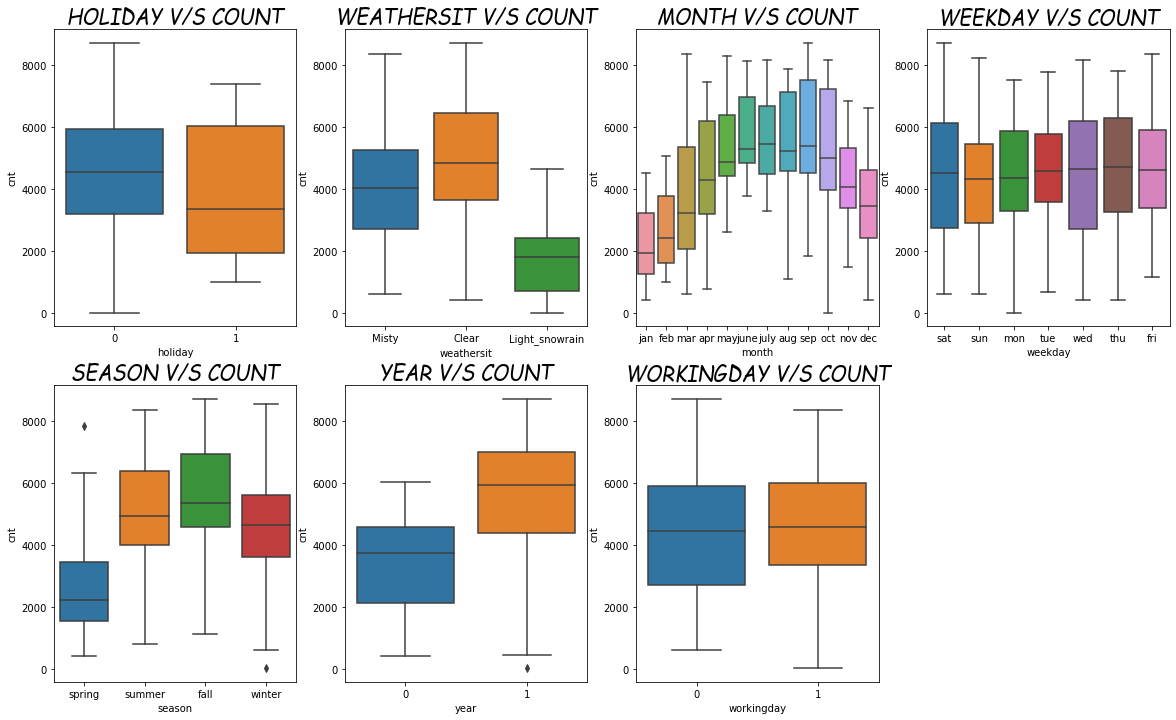

In [68]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = boom_bike_data_analysis).set_title('HOLIDAY V/S COUNT',fontsize=20,fontstyle='italic',fontfamily='cursive')
plt.subplot(2,4,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boom_bike_data_analysis).set_title('WEATHERSIT V/S COUNT',fontsize=20,fontstyle='italic',fontfamily='cursive')
plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'cnt', data = boom_bike_data_analysis).set_title('MONTH V/S COUNT',fontsize=20,fontstyle='italic',fontfamily='cursive')
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = boom_bike_data_analysis).set_title('WEEKDAY V/S COUNT',fontsize=20,fontstyle='italic',fontfamily='cursive')
plt.subplot(2,4,5)
sns.boxplot(x = 'season', y = 'cnt', data = boom_bike_data_analysis).set_title('SEASON V/S COUNT',fontsize=20,fontstyle='italic',fontfamily='cursive')
plt.subplot(2,4,6)
sns.boxplot(x = 'year', y = 'cnt', data = boom_bike_data_analysis).set_title('YEAR V/S COUNT',fontsize=20,fontstyle='italic',fontfamily='cursive')
plt.subplot(2,4,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = boom_bike_data_analysis).set_title('WORKINGDAY V/S COUNT',fontsize=20,fontstyle='italic',fontfamily='cursive')
plt.show()

# INITIAL INFERENCES:

> - Most Booking in Season type Fall. And, in each season the
    Booking count has increased drastically from 2018 to 2019.
> - Most of the bookings has been done during the month of may, june, july, aug, sep
    and oct. Trend increased starting of the year till mid of the year and then it
    started decreasing as we approached the end of year.
> - Clear weather attracted more booking Due to better Visibility in Decreasing order of Clear, Misty . Light_snowrain
> - Wed, Thu, Fri, Sat have more number of bookings as compared to the start of
	the week.
> - When it’s not holiday, booking seems to be less in number which seems
	reasonable as on holidays, people may want to spend time at home and enjoy
	with family. More time can be allocated for Outings and physical activity like Cycling/bikes.
> - Booking seemed to be almost equal either on working day or non-working day.
	2019 attracted more number of booking from the previous year, which shows
	good progress in terms of business.


# Checking each CATEGORICAL Variable in 2018 & 2019 to derive more EDA:

# To Avoid Repeated code writing a function to Plot the Palette Barplot against Year 2018, 2019


In [69]:
# function to create barplot related to categorical columns


def plot_categorical_bar(column):
    plt.figure(figsize = (18,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=boom_bike_data_analysis).set_title(bar_column_Title_1,fontsize=20,fontstyle='italic',fontfamily='cursive')
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=boom_bike_data_analysis, hue='year',palette=color_pallete).set_title(bar_column_Title_2,fontsize=20,fontstyle='italic',fontfamily='cursive')
    plt.legend(labels=['2018', '2019'])
    plt.show()

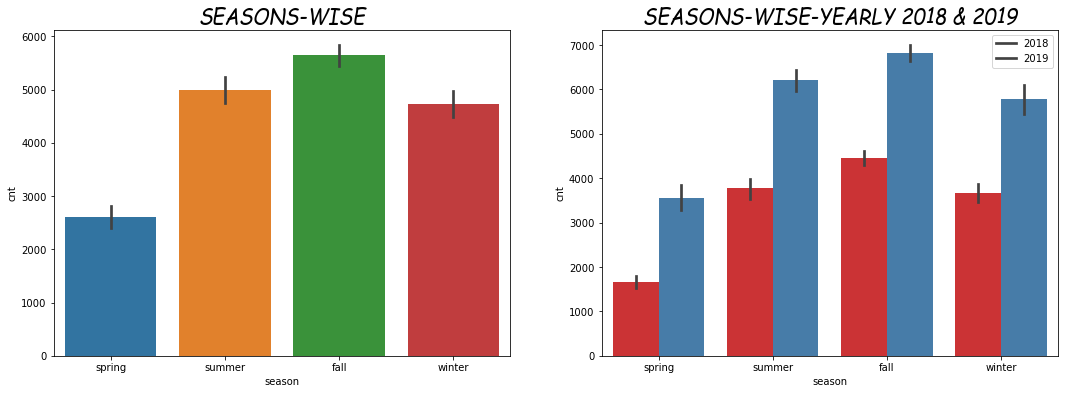

In [70]:
# VISUALIZATION of Data in SEASON YEARLY 2018-2019 
bar_column_name = 'season'
bar_column_Title_1 = 'SEASONS-WISE'
bar_column_Title_2 = 'SEASONS-WISE-YEARLY 2018 & 2019'
color_pallete = 'Set1'
plot_categorical_bar(bar_column_name)

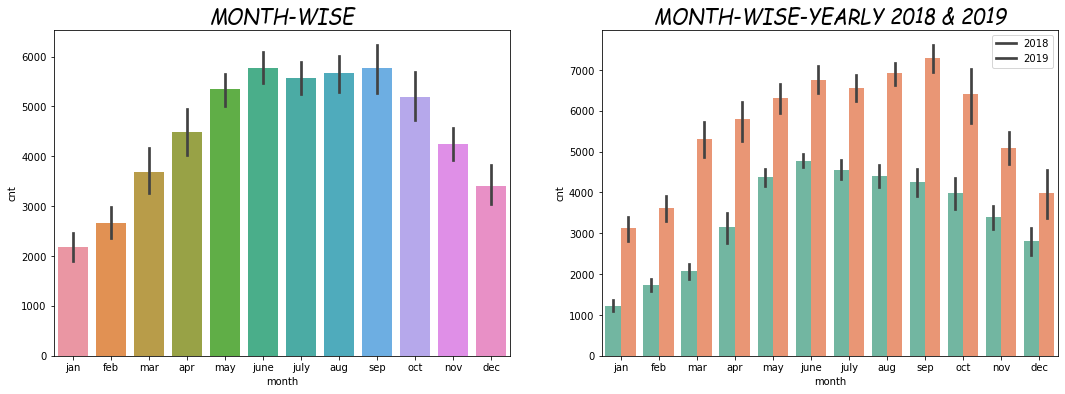

In [71]:
# VISUALIZATION of Data in MONTH YEARLY 2018-2019 
bar_column_name = 'month'
bar_column_Title_1 = 'MONTH-WISE'
bar_column_Title_2 = 'MONTH-WISE-YEARLY 2018 & 2019'
color_pallete = 'Set2'
plot_categorical_bar(bar_column_name)

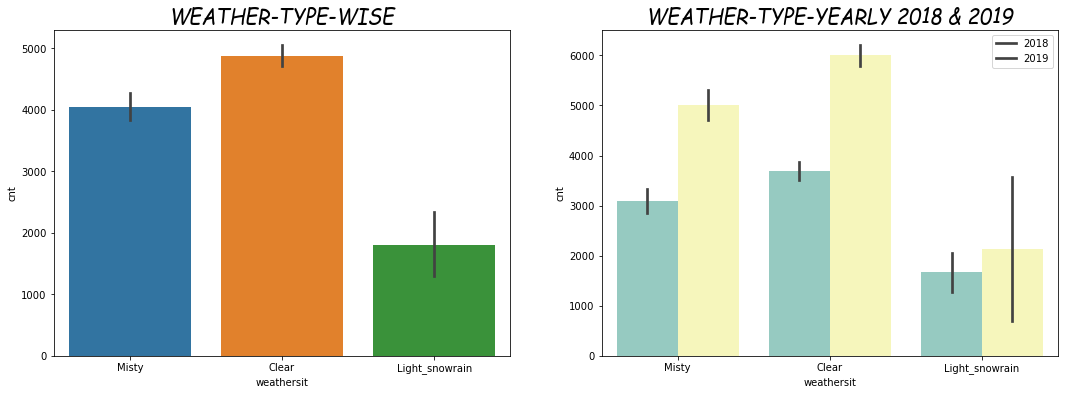

In [72]:
# VISUALIZATION of Data in WEATHERSIT YEARLY 2018-2019 
bar_column_name = 'weathersit'
bar_column_Title_1 = 'WEATHER-TYPE-WISE'
bar_column_Title_2 = 'WEATHER-TYPE-YEARLY 2018 & 2019'
color_pallete = 'Set3'
plot_categorical_bar(bar_column_name)

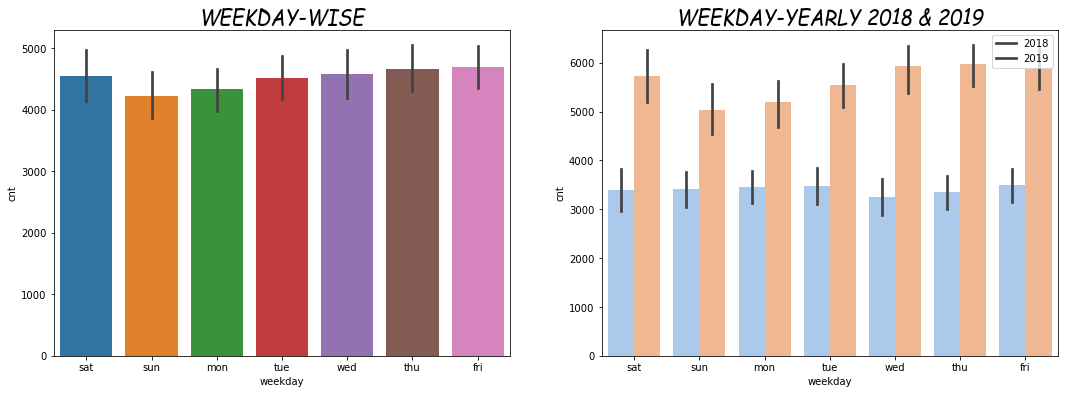

In [73]:
# VISUALIZATION of Data in WEEKDAY YEARLY 2018-2019 
bar_column_name = 'weekday'
bar_column_Title_1 = 'WEEKDAY-WISE'
bar_column_Title_2 = 'WEEKDAY-YEARLY 2018 & 2019'
color_pallete = 'pastel'
plot_categorical_bar(bar_column_name)

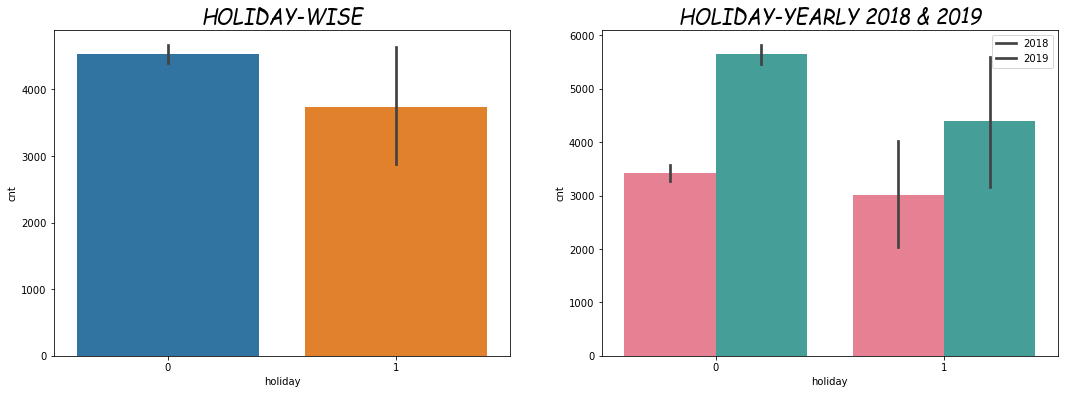

In [74]:
# VISUALIZATION of Data in HOLIDAY YEARLY 2018-2019 
bar_column_name = 'holiday'
bar_column_Title_1 = 'HOLIDAY-WISE'
bar_column_Title_2 = 'HOLIDAY-YEARLY 2018 & 2019'
color_pallete = 'husl'
plot_categorical_bar(bar_column_name)

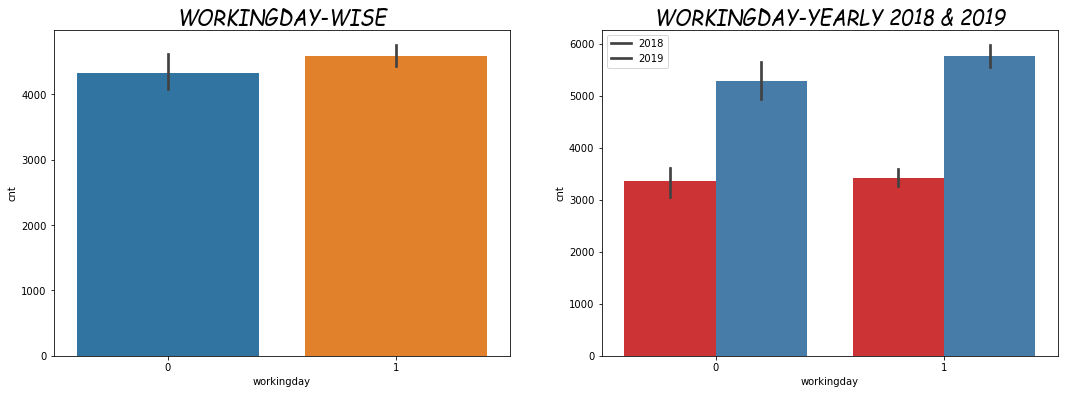

In [75]:
# VISUALIZATION of Data in WORKING DAY YEARLY 2018-2019 
bar_column_name = 'workingday'
bar_column_Title_1 = 'WORKINGDAY-WISE'
bar_column_Title_2 = 'WORKINGDAY-YEARLY 2018 & 2019'
color_pallete = 'Set1'
plot_categorical_bar(bar_column_name)

# ------------------------------------------------------------------------------------------------------------

# NUMERICAL VARIABLES:

Initially we can try to get a rough Visualization Idea by making PairPlot of the Data
for all the Numerical Variables such as :

>    - windspeed
>    - cnt
>    - temp
>    - atemp 
>    - humidity


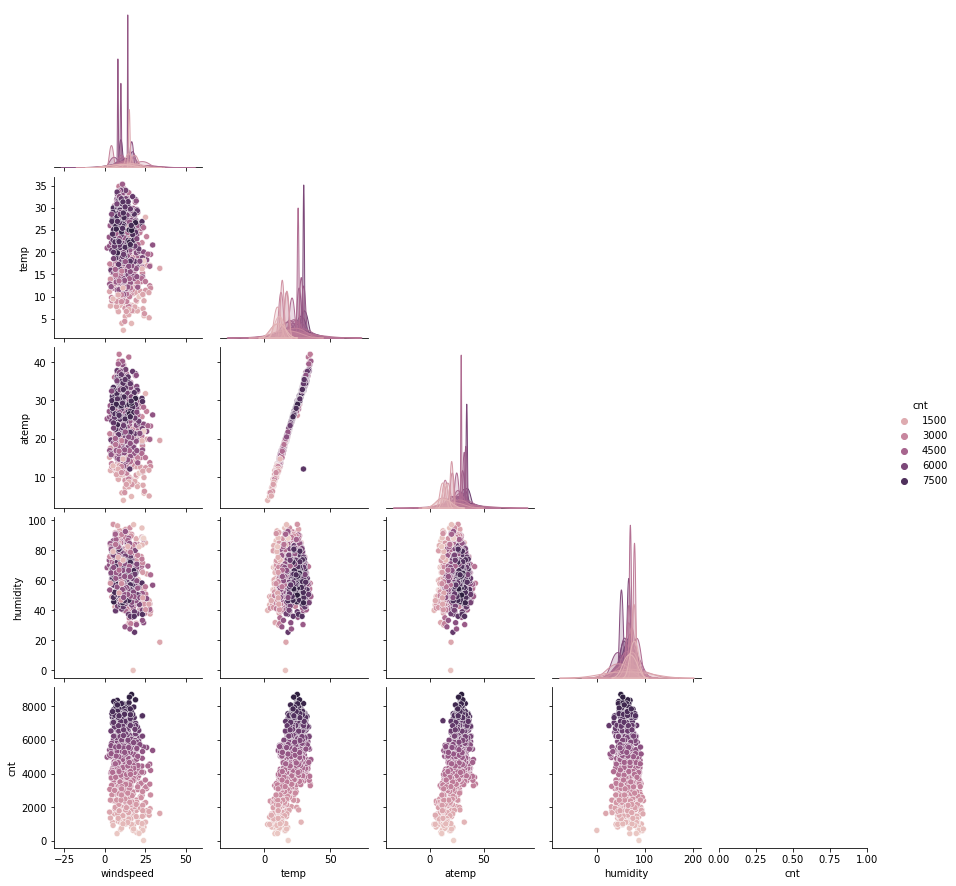

In [76]:
sns.pairplot(data=boom_bike_data_analysis,vars=['windspeed', 'temp', 'atemp', 'humidity','cnt'], hue = 'cnt',corner=True)
plt.show()

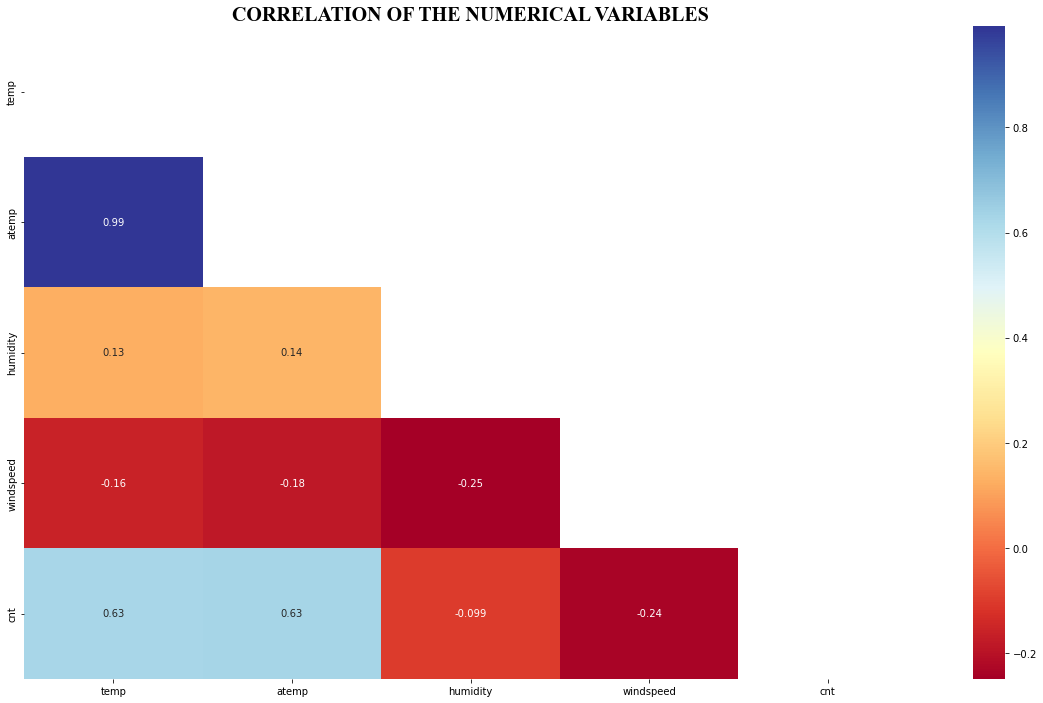

In [77]:
# Checking the correlation between the numerical variables, We will need to Plot a correlation chart, for temp, atemp, humidity , windspeed, cnt.

plt.figure(figsize = (20,12))
matrix = np.triu(boom_bike_data_analysis[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(boom_bike_data_analysis[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlBu", mask=matrix)
plt.title("CORRELATION OF THE NUMERICAL VARIABLES", fontname="Times New Roman",fontweight="bold", fontsize=20)
plt.show()

Due to linear relationship between temp and atemp, they will not be used for the model due to multicolinearity. We need to decide w.r.t other variables which parameters to keep based on p-value and VIF

# -------------------------------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------------------------------Data understanding, preparation and EDA - ENDS HERE.....!!!!-----------------------------------------------------------------------------------------------------------------------------------


# 

 # ======================================================================================  ------------------------------- [           MODEL BUILDING AND EVALUATION     ]  -----------------===================================================================
 
 
 
 


# Step 1:  Training Model Data Preparation



# Variables selection: The Categorical Variables selected for dummy variables are as below:
>       - seasons
>       - weathersit
>       - weekdays
>       - months

In [78]:
boom_bike_data_analysis.shape

(730, 12)

In [79]:
#CLARIFICATION: HERE "boom_bike_data_model" is the data set as boom_bike_data_analysis, created to operate on training model 
boom_bike_data_model = boom_bike_data_analysis
boom_bike_data_model.head(3)
#boom_bike_data_model.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

#CREATING DUMMY DATA MODELS as mentioned above: Using pd.get_dummies command
#----------------------------------------------------------------------------------------------------------------------------
months_dummy=pd.get_dummies(boom_bike_data_model.month,drop_first=True)
weekdays_dummy=pd.get_dummies(boom_bike_data_model.weekday,drop_first=True)
weathersit_dummy=pd.get_dummies(boom_bike_data_model.weathersit,drop_first=True)
seasons_dummy=pd.get_dummies(boom_bike_data_model.season,drop_first=True)
#----------------------------------------------------------------------------------------------------------------------------

#We will now merge the above Dummy DataSets together alongwith our "boom_bike_data_model", thus Creating "boom_bike_data_model_new"
#Using pd.concat command:
#----------------------------------------------------------------------------------------------------------------------------
boom_bike_data_model_new = pd.concat([boom_bike_data_model,months_dummy,weekdays_dummy,weathersit_dummy,seasons_dummy],axis=1)
#----------------------------------------------------------------------------------------------------------------------------

#drop the Dummy Variables seasons, weathersit, weekdays , months since we created dummy columns in place of them:
#----------------------------------------------------------------------------------------------------------------------------
boom_bike_data_model_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
#----------------------------------------------------------------------------------------------------------------------------
boom_bike_data_model_new.head(3)

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0


# Step 2:  SPLITTING THE DATA INTO TRAINING AND TEST DATA

## We are splitting the data set into 2 sections as below:
    > - boom_bike_data_model_train
    > - boom_bike_data_model_test

### We will use 70% and 30% as training and test data Respectively

In [80]:
np.random.seed(0)
boom_bike_data_model_train, boom_bike_data_model_test = train_test_split(boom_bike_data_model_new, train_size = 0.7, random_state = 100)

In [81]:
#checking shape of both data Sets
print('TRAIN DATA SHAPE = ',boom_bike_data_model_train.shape)
print(' TEST DATA SHAPE = ',boom_bike_data_model_test.shape)

TRAIN DATA SHAPE =  (510, 30)
 TEST DATA SHAPE =  (220, 30)


# Step 3:  Scaling the Data

## Objective: To Scale the Numeric data Between the Values 0 to 1, for ease of Model Training

### Since Previous Boxplots did not have many Outliers, We could scale the data using sklearn, MinMaxScaler(), fit_transform,  where num_var_list = ['temp','atemp','humidity','windspeed','cnt'], Basically all Numeric Variables


In [82]:
#What does the data look like Before Scaling?
boom_bike_data_model_train.head(3)

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0


In [83]:
# Declaring the 'scaler' variable as MinMaxScaler from sklearn library
#=======================
scaler = MinMaxScaler()
#=======================

num_var_list = ['temp','atemp','humidity','cnt', 'windspeed']    #column list = num_var_list to reduce code

# SCALED THE TRAINING MODEL USING fit_transform command
#========================================================================================================
boom_bike_data_model_train[num_var_list] = scaler.fit_transform(boom_bike_data_model_train[num_var_list])
#========================================================================================================


#What does the data look like After Scaling?
boom_bike_data_model_train.head(3)



,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0


# ------------------------------------------------------------------------------------------------------

# Step 4: Check Most Highly Correlated Variables using correlation coefficient Heat map Seaborn:

#### matrix = correlation data of boom_bike_data_model_train dataset which is scaled

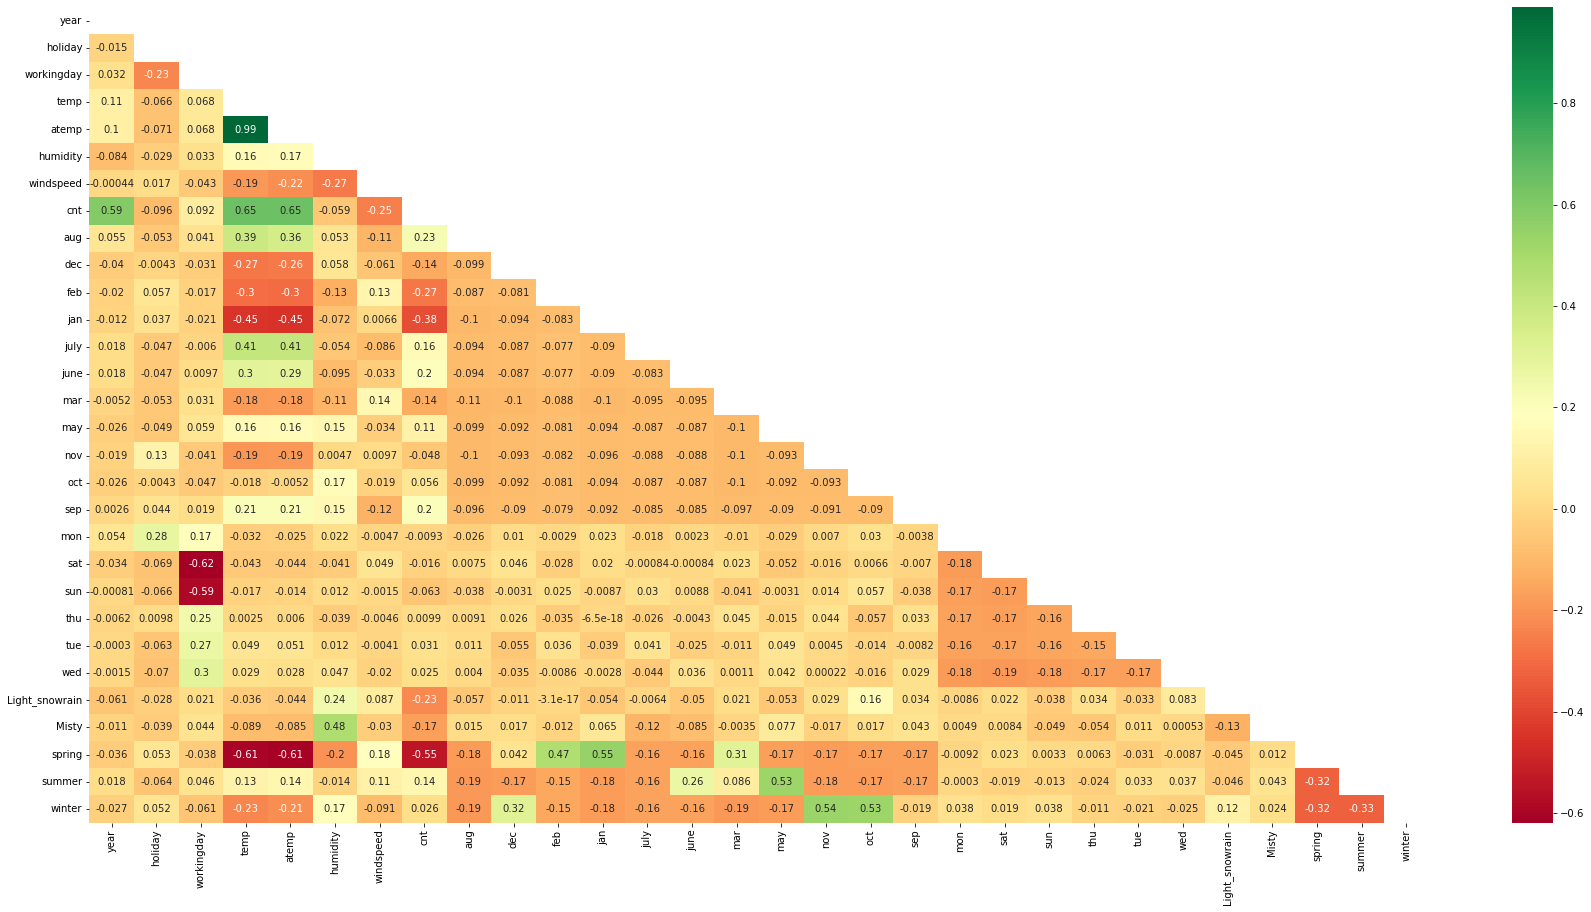

In [84]:
plt.figure(figsize = (30,15))
matrix = np.triu(boom_bike_data_model_train.corr())
sns.heatmap(boom_bike_data_model_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()


###  Highly Correlated Variables as below: Verifying with Most Green Areas and the value in the field corr box

    > Temp & atemp (This will happen since they are temp in different measuring systems)
    > spring and jan
    > may and summer
    > Winter and nov,oct
    > cnt with year , temp, atemp
    

# ------------------------------------------------------------------------------------------------------

# Step 5: BUILDING LINEAR MODEL:


#### We will be using RFE - recursive Feature elimination for Building the Linear model, where we will have X_train and y_train, as per nomenclature X is used Capital and y is used as small caps

In [85]:
# Start building the Linear Model
#==============================================
y_train = boom_bike_data_model_train.pop('cnt')               #remove cnt column and add to y_train
X_train = boom_bike_data_model_train
#==============================================
# Using RFE in Building the Linear Model for TOP 15 Variables, using linear regression function
#=======================
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)                                             # Will use only TOP 15 Variables to perform the RFE
rfe = rfe.fit(X_train, y_train)
#==============================
# Populating the col variable list from the RFE variable selection:
#====================================
col = X_train.columns[rfe.support_]
print('selected Columns = ',col)                                    #Print columns that are selected
print('Not selected columns = ',X_train.columns[~rfe.support_])     #Print columns that are not selected
#====================================

selected Columns =  Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')
Not selected columns =  Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')


##### To Avoid Repeated use of Code to Calculate the VIF(variance inflation factor) we will write a function as below to get the VIF for Every Model Train as a input variable to the same function

In [86]:
#Note: here df is just a variable to inform the function to take the train models as input 


def calculateVIF(df):
    vif = pd.DataFrame()                                     #Declaring the variable vif as a dataframe
    vif['Features'] = df.columns     #Adding columns as input to features column in new dataframe
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]   #the variance inflation factor is added to a new columns called VIF, and added as a value
    vif['VIF'] = round(vif['VIF'], 2)                        #rounding off all the VIFs to 2nd decimal 
    vif = vif.sort_values(by = "VIF", ascending = False)     #Ascending sort
    return vif                                               #vif dataframe created for 

In [87]:
# dataframe with RFE selected variables
X_train_rfe = X_train[col]
# calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Misty,2.29
0,year,2.09
9,sat,1.98


#### As per above table Humidity has the Highest VIF value > 10 , (29.37), second highest is temp (17.78)we need to evaluate ,whether we can go in for Regression with these 2 variables

# ------------------------------------------------------------------------------------------------------

# Step 6: BUILDING LINEAR REGRESSION MODELS:


## Here we shall start building more and more Regression models with the goal of reducing the VIF < 4 Ideally , it will be tolerable if it reaches below 5.

## For this we will use the OLS (Ordinary least squares) technique, after every OLS fit we will check for the VIF if its reduced or drop the columns which have a high VIF, also we will drop the ones having a high p-value.

#### LINEAR REGRESSION MODEL -1: 

In [88]:
#INITIAL REGRESSION:
#====================
X_train_lm_1 = sm.add_constant(X_train_rfe)    #from the rfe , adding a constant to the X_train_lm_1(Linear regression model 1)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()      #Fitting the OLS for X_train & y_train -->> lr_1 variable
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          4.22e-191
Time:                        03:16:14   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

In [89]:
# Note in the Previous LINEAR MODEL we saw Humidity with a high VIF, will drop the column for X_Train, and insert ti X_train_new
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Calling the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,year,2.08
13,winter,1.98
8,sat,1.97
5,jan,1.62
6,july,1.59


#### Still we see workingday and temp above > 5 need to work in that also , to reduce VIF, although less than < 10 is also ok but we should try to get it below < 5

#### LINEAR REGRESSION MODEL -2: 

In [90]:
X_train_lm_2 = sm.add_constant(X_train_new)   #from the previous X_train_new , adding a constant to the X_train_lm_2(Linear regression model 2)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()     #Fitting the OLS for X_train_lm_2 & y_train -->> lr_2 variable
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          1.60e-188
Time:                        03:16:17   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

In [91]:
# We can drop holiday variable as it has high p-value
X_train_new = X_train_new.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
10,spring,2.99
11,summer,2.33
0,year,2.08
12,winter,1.91
7,sat,1.84
4,jan,1.62
5,july,1.59


#### Still VIF for Temp is 6.82 > 5 , lets drill deeper on another model of regression

#### LINEAR REGRESSION MODEL -3: 

In [92]:
X_train_lm_3 = sm.add_constant(X_train_new)   #from the previous X_train_new , adding a constant to the X_train_lm_3(Linear regression model 3)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()     #Fitting the OLS for X_train_lm_3 & y_train -->> lr_3 variable
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          8.68e-189
Time:                        03:16:19   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1657      0.031      5.

In [93]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
9,spring,2.38
10,summer,2.32
0,year,2.07
11,winter,1.91
6,sat,1.83
4,july,1.58
8,Misty,1.57


#### LINEAR REGRESSION MODEL -4: 

In [94]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
8,spring,2.30
0,year,2.07
9,summer,2.00
5,sat,1.83
10,winter,1.76
7,Misty,1.57
4,sep,1.23


#### LINEAR REGRESSION MODEL -5: 

In [95]:
X_train_lm_5 = sm.add_constant(X_train_new)   #from the previous X_train_new , adding a constant to the X_train_lm_5(Linear regression model 5)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()     #Fitting the OLS for X_train_lm_5 & y_train -->> lr_5 variable
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          1.42e-188
Time:                        03:16:23   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1406      0.031      4.

In [96]:
# We can drop spring variable as it has high p-value
X_train_new = X_train_new.drop(['spring'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,year,2.02
5,sat,1.69
8,summer,1.57
7,Misty,1.53
9,winter,1.40
4,sep,1.20
6,Light_snowrain,1.08


#### LINEAR REGRESSION MODEL -6: 

In [97]:
X_train_lm_6 = sm.add_constant(X_train_new)   #from the previous X_train_new , adding a constant to the X_train_lm_6(Linear regression model 6)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()     #Fitting the OLS for X_train_lm_6 & y_train -->> lr_6 variable
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          3.13e-188
Time:                        03:16:25   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0750      0.019      4.


#### Here we see the p-values as zero 0. So we can probably stop regression here the 6th Regression Model.


In [98]:
#### Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,year,2.02
5,sat,1.69
8,summer,1.57
7,Misty,1.53
9,winter,1.40
4,sep,1.20
6,Light_snowrain,1.08


#### Here we see F-statistics is 253.0 > 1 , & the p-Value is zero so , we can accept this overall
# LINEAR REGRESSION MODEL NO 6th is good and acceptable

In [99]:
#CHECK THE PARAMETERS OF lr_6, Basically the co-efficient values
lr_6.params

const             0.075009
year              0.233139
workingday        0.056117
temp              0.549892
windspeed        -0.155203
sep               0.097365
sat               0.067500
Light_snowrain   -0.287090
Misty            -0.080022
summer            0.088621
winter            0.130655
dtype: float64

# ----------------------------------------------------------------------------------------------------------------------LINEAR REGRESSION MODEL BUILDING  - ENDS HERE.....!!!!-----------------------------------------------------------------------------------------------------------------------------------


# Step 7: Residual Analysis of train data and validation, of lr_6:


### In residual Analysis we need to setup a predictor for y_train_pred, under training model 6(X_train_lm_6) to predict normality of error terms , Idealy the error terms should follow NORMAL distribution, we can do that by a histogram.

### And to check the Validity of the Training model no 6, we can plot the correlation chart as a heat map to check this, and no multicollenearity

In [100]:
y_train_pred = lr_6.predict(X_train_lm_6)  #Defining the y_train_pred as a predictor for lr_6 model
print(X_train_lm_6.shape)
X_train_lm_6.head(3)


(510, 11)


,const,year,workingday,temp,windspeed,sep,sat,Light_snowrain,Misty,summer,winter
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,1,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0


Text(0.5, 0, 'Error TERMS')

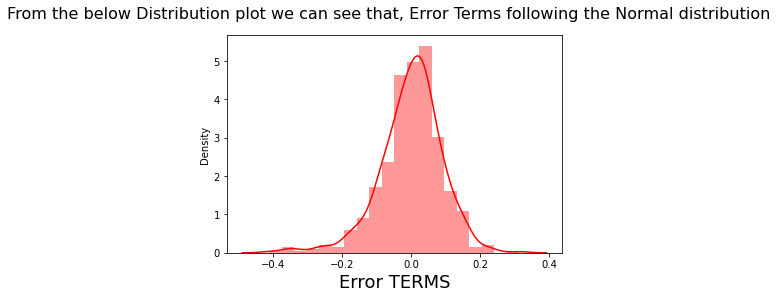

In [101]:
# Formula for ERROR TERMS = y_train - y_train_pred
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20, color = 'red')
fig.suptitle('From the below Distribution plot we can see that, Error Terms following the Normal distribution', fontsize = 16) 
plt.xlabel('Error TERMS', fontsize = 18)


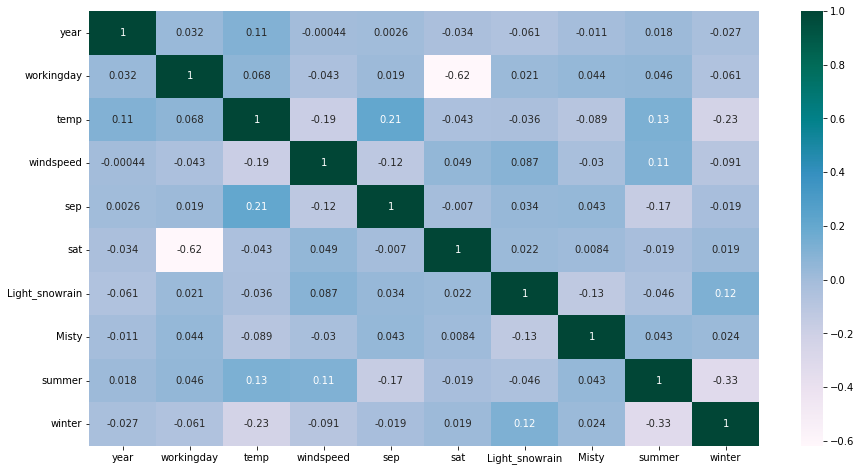

In [102]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="PuBuGn")
plt.show()

# There is no multicolinearity as seen from the heatmap. VIF values are less than < 5. 

### CHECK LINEARITY RANDOMLY: 

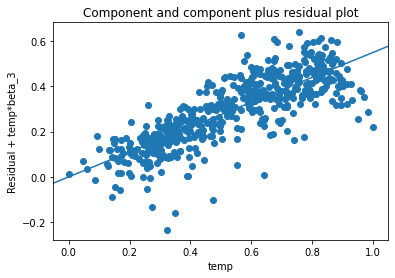

In [103]:
#Using one of the Variables like temp , to check linearity , COMPONENT & COMPONENT + RESIDUAL
sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()


# Step 8: PREDICTING USING FINAL MODEL lm_6
### Now to perform this we need to do the below:

    > Apply Scaling on test data 
    > add constant variable to test Dataframe
    > Generate y_test, y_pred and compare them to get r2_score
    > Calculate the r2_score, coefficient of determiniation from the predicting variable


In [104]:
num_var_list = ['temp','atemp','humidity','cnt', 'windspeed']    #column list = num_var_list to reduce code

# SCALED THE TRAINING MODEL USING fit_transform command
#========================================================================================================
boom_bike_data_model_test[num_var_list] = scaler.transform(boom_bike_data_model_test[num_var_list])
#========================================================================================================

#What does the data look like After Scaling?
boom_bike_data_model_test.head(3)



,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1


In [105]:
# Start building the Linear Model
#==============================================
y_test = boom_bike_data_model_test.pop('cnt')               #remove cnt column and add to y_test
X_test = boom_bike_data_model_test
#==============================================

col_test = X_train_new.columns                             #Columns for X_test shall be derived from X_train_new
X_test = X_test[col_test]
X_test_lm_6 = sm.add_constant(X_test)                       # Adding constant variable to X_test_lm_6

#Calculate y_pred by using Predict function
y_pred = lr_6.predict(X_test_lm_6)                          #Here we derive the y_pred from lr_6, with X_test_lm_6

#Calculate r2 and round off
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7961

# Step 9: MODEL EVALUATION
### A scatter Plot will be able to determine the linear relationship between the Variables

#### Idea here is to plot the points between y_test, V/S y_pred to check relation Visually on the scatter plot
#### Calculate the formula for the line, 
#### Plot a Regression plot to understand visually the fit on test data
#### Finally Comparison between Training set and Data set based on r2 values


Text(0, 0.5, 'y_pred')

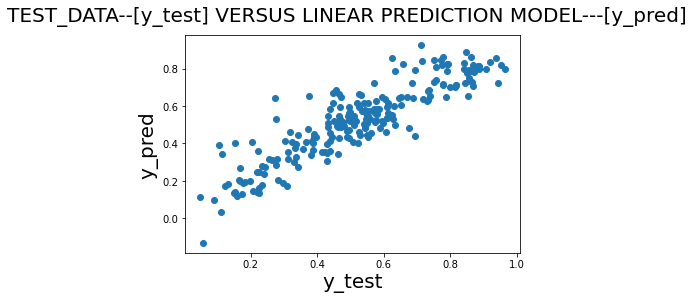

In [106]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('TEST_DATA--[y_test] VERSUS LINEAR PREDICTION MODEL---[y_pred]', fontsize = 20) 
plt.xlabel('y_test', fontsize = 20)
plt.ylabel('y_pred', fontsize = 20) 

In [107]:
#ROUNDING OFF CO-EFFICENTS TO 3 decimals to calculate the slope of line
round(lr_6.params,3)   

const             0.075
year              0.233
workingday        0.056
temp              0.550
windspeed        -0.155
sep               0.097
sat               0.068
Light_snowrain   -0.287
Misty            -0.080
summer            0.089
winter            0.131
dtype: float64

### By above table the formula for the best Fitted line is as below:
##### cnt = 0.1909 + (year x 0.233) + (workingday x 0.056) + (temp x 0.550) - (windspeed x 0.155) + (sep x 0.097) + (sat x 0.068) - (Light_snowrain x 0.0287) - (Misty x 0.080) + (summer x 0.089) + (winter x 0.131)

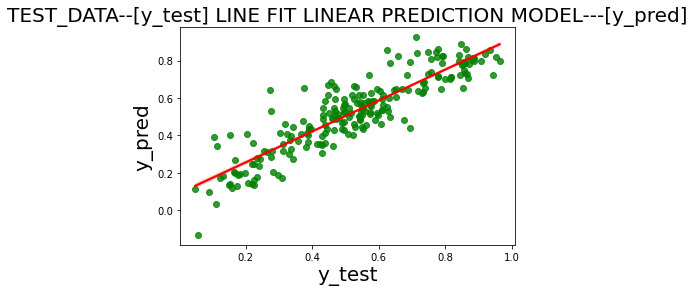

In [108]:
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('TEST_DATA--[y_test] LINE FIT LINEAR PREDICTION MODEL---[y_pred]', fontsize=20)
plt.xlabel('y_test', fontsize=20)
plt.ylabel('y_pred', fontsize=20)
plt.show()

# Training and Testing dataset Comparison:
    - Train dataset R^2          : 0.835
    - Test dataset R^2           : 0.8038
    - Train dataset Adjusted R^2 : 0.832    
    - Test dataset Adjusted R^2  : 0.7961

#### Demand of bikes depend on year, workingday, temp, windspeed, sep, sat, Light_snowrain, Misty, , summer and winter.(This information is derived from lr_6 Parameters)


 # ======================================================================================  ---------------------------------- [ > SUBJECTIVE QUESTIONS < ]----------------------------===================================================================
 
 
 
 


# Assignment-based Subjective Questions

1. From your analysis of the categorical variables from the dataset, what could you infer about
their effect on the dependent variable? (3 marks)
###### This is taken from the Initial Inferences calculated above in the Data Preparation and EDA
> - Most Booking in Season type Fall. And, in each season the
    Booking count has increased drastically from 2018 to 2019.
> - Most of the bookings has been done during the month of may, june, july, aug, sep
    and oct. Trend increased starting of the year till mid of the year and then it
    started decreasing as we approached the end of year.
> - Clear weather attracted more booking Due to better Visibility in Decreasing order of Clear, Misty . Light_snowrain
> - Wed, Thu, Fri, Sat have more number of bookings as compared to the start of
	the week.
> - When it’s not holiday, booking seems to be less in number which seems
	reasonable as on holidays, people may want to spend time at home and enjoy
	with family. More time can be allocated for Outings and physical activity like Cycling/bikes.
> - Booking seemed to be almost equal either on working day or non-working day.
	2019 attracted more number of booking from the previous year, which shows
	good progress in terms of business.

2. Why is it important to use drop_first=True during dummy variable creation? (2 mark)
    > - During the Process of Creating dummy variables , extra column is already present e.g drop_first = True is important to use, as it helps in reducing the extra column created during 
        dummy variable creation. It helps reduce the correlations created among dummy variables.     
3. Looking at the pair-plot among the numerical variables, which one has the highest correlation
with the target variable? (1 mark)
    > - the Variable 'temp' has the highest correlation with the target variable
4. How did you validate the assumptions of Linear Regression after building the model on the
training set? (3 marks)
    > - ERROR TERMS NORMALITY - The Distribution of error terms with normal evident from histogram
    > - LINEAR RELATIONSHIP - From the scatter plot linear relationship was visible with the variables
    > - MULTI-COLINEARITY CHECK - For the Linear model, the heat map showed no multi-collinearity with the variable
    
5. Based on the final model, which are the top 3 features contributing significantly towards
explaining the demand of the shared bikes? (2 marks)
  ###### The Below Variables are totally based on the calculations above:
    > - temp = 0.549892,
    > - year = 0.233139,
    > - winter = 0.130655,



# FINAL INFERENCES
### To answer the below Questions:
> - Which variables are significant in predicting the demand for shared bikes?
> - How well those variables describe the bike demands?

## This can be answered by the below Prediction derived Formula: 
### cnt = 0.1909 + (year x 0.233) + (workingday x 0.056) + (temp x 0.550) - (windspeed x 0.155) + (sep x 0.097) + (sat x 0.068) - (Light_snowrain x 0.0287) - (Misty x 0.080) + (summer x 0.089) + (winter x 0.131)

  > - All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.
  > - All the negative coefficients  indicate that an increase in these values will lead to an decrease in the value of cnt.

# Answers to Boombikes Questions to help them in Business:

> ● Temp is the most significant with the largest coefficient. Followed by year, windspeed & september and summer.

> ● Bike rentals is more for the month of september

> ● The rentals reduce during holidays

> ● This indicates that the bike rentals is majorly affected by temperature,season and month.

 # ======================================================================================  --------------------------------------- [ > CONCLUSION < ]--------------------------------===================================================================
 
 
 
 


#### This was an enjoyable and challenging case study, Shasheesh Rane(Myself) have tried to include all we could and follow the Rubric as described by Upgrad. In terms of :

> - DATA UNDERSTANDING , PREPARATION AND EDA
> - MODEL BUILDING AND EVALUATION
> - CODING GUIDELINES
> - SUBJECTIVE QUESTIONS

####  We also utilized functions for custom tasks , to not repeat the code, and labelled the Graphs, Plots correctly.
####  We intend to do more case Assignments in future and also learn more thus being able to upskill ourselves.
####  Our best sincere efforts were put in this assignment.


#### Thanking you,

# SHASHEESH RANE (Group Facilitator)

